#Análisis de ventas Tiendas Mr. Joao  

*Informe al final del código*

### Importación de datos



In [25]:
# Se cargan los archivos y crean lo Df
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

pd.options.display.max_columns = None
pd.options.display.max_rows = None

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


In [26]:
# Importando librerias
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


In [27]:
# Conociendo los DF
tienda.info()
print("____________________________________________")
tienda2.info()
print("____________________________________________")
tienda3.info()
print("____________________________________________")
tienda4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB
____________________________________________
<class 'pandas.core.frame.DataFrame'>
Rang

In [28]:
# Renombrando Columnas
from os import rename
tienda.rename(columns={"Categoría del Producto" : "Categoria", "Precio ": "Precio", "Costo de envío": "Envio", "Fecha de Compra": "FechaDeCompra", "Lugar de Compra": "Lugar", "Calificación": "Calificacion", "Método de pago": "Pago", "Cantidad de cuotas": "Cuotas"}, inplace=True)
tienda2.rename(columns={"Categoría del Producto" : "Categoria", "Precio ": "Precio", "Costo de envío": "Envio", "Fecha de Compra": "FechaDeCompra", "Lugar de Compra": "Lugar", "Calificación": "Calificacion", "Método de pago": "Pago", "Cantidad de cuotas": "Cuotas"}, inplace=True)
tienda3.rename(columns={"Categoría del Producto" : "Categoria", "Precio ": "Precio", "Costo de envío": "Envio", "Fecha de Compra": "FechaDeCompra", "Lugar de Compra": "Lugar", "Calificación": "Calificacion", "Método de pago": "Pago", "Cantidad de cuotas": "Cuotas"}, inplace=True)
tienda4.rename(columns={"Categoría del Producto" : "Categoria", "Precio ": "Precio", "Costo de envío": "Envio", "Fecha de Compra": "FechaDeCompra", "Lugar de Compra": "Lugar", "Calificación": "Calificacion", "Método de pago": "Pago", "Cantidad de cuotas": "Cuotas"}, inplace=True)

#1. Análisis de facturación



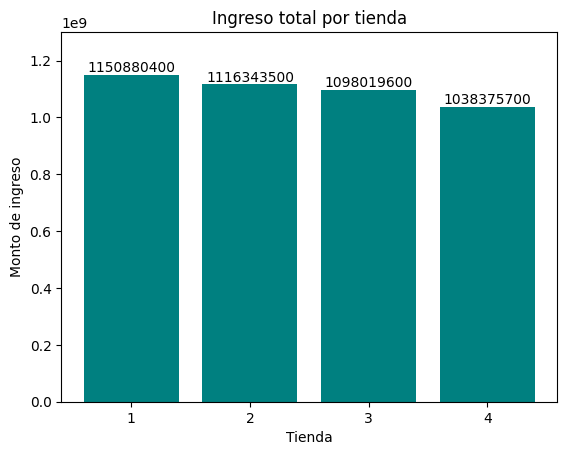

In [29]:
# Tienda que más vende
import matplotlib.pyplot as plt

tienda_total_ventas = int(sum(tienda.Precio))
tienda2_total_ventas = int(sum(tienda2.Precio))
tienda3_total_ventas = int(sum(tienda3.Precio))
tienda4_total_ventas = int(sum(tienda4.Precio))

sum_total_ventas = [tienda_total_ventas, tienda2_total_ventas, tienda3_total_ventas, tienda4_total_ventas]
plt.bar(["1", "2", "3", "4"], sum_total_ventas, color = "teal")
for i, h in enumerate(sum_total_ventas):
    plt.text(i, h, str(h), ha='center', va='bottom', fontsize=10)
plt.title("Ingreso total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Monto de ingreso")
plt.ylim(0, 1300000000)
plt.show()


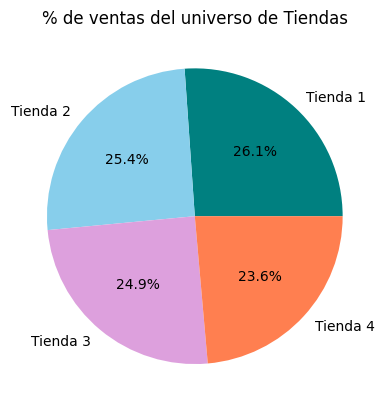

In [30]:
# Panorama Universo de ventas
Total = sum([tienda_total_ventas, tienda2_total_ventas, tienda3_total_ventas, tienda4_total_ventas])
tienda_porcentaje = round(((tienda_total_ventas / Total) * 100), 1 )
tienda2_porcentaje = round(((tienda2_total_ventas / Total) * 100), 1 )
tienda3_porcentaje = round(((tienda3_total_ventas / Total) * 100), 1 )
tienda4_porcentaje = round(((tienda4_total_ventas / Total) * 100), 1 )

ventas_por_tienda = [tienda_porcentaje, tienda2_porcentaje, tienda3_porcentaje, tienda4_porcentaje]
plt.pie(ventas_por_tienda, labels = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"], colors = ["teal", "skyblue", "plum", "coral"], autopct='%1.1f%%', startangle=0)
plt.title("% de ventas del universo de Tiendas")
plt.show()

# 2. Ventas por categoría

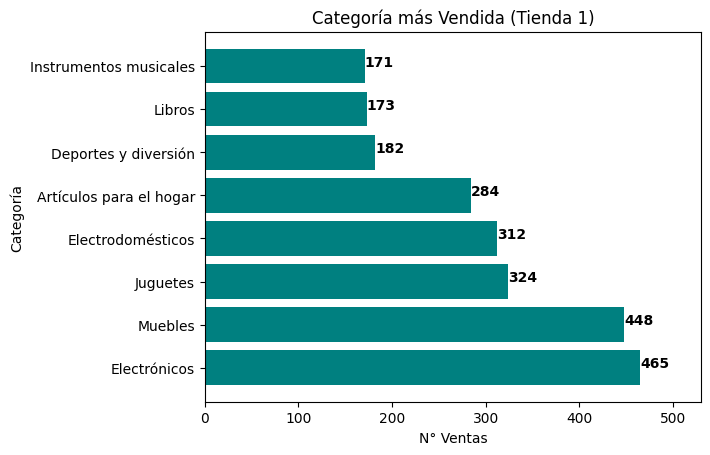

In [31]:
frecuencia = tienda['Categoria'].value_counts().tolist()
nombresCategoria = tienda.Categoria.unique()

lista_nombresCategoria = []

for categoria in nombresCategoria:
  lista_nombresCategoria.append(categoria)

plt.barh(lista_nombresCategoria, frecuencia, color = "teal")

for i, v in enumerate(frecuencia):
    plt.text(v, i, str(v), color='black', fontweight='bold')

plt.title("Categoría más Vendida (Tienda 1)")
plt.xlabel("N° Ventas")
plt.ylabel("Categoría")
plt.xlim(0, 530)
plt.show()


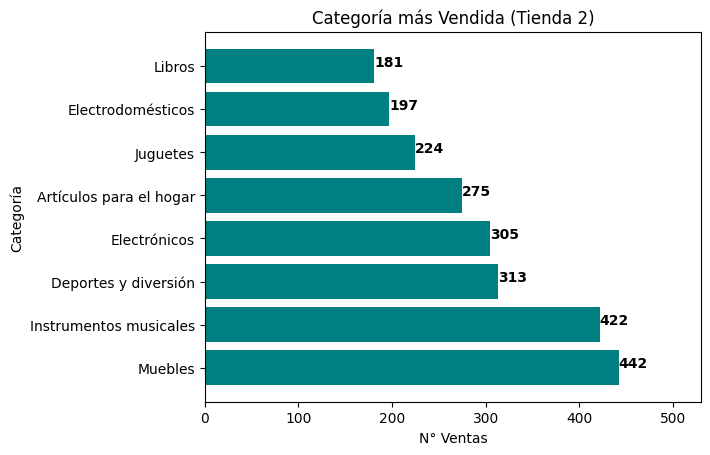

In [32]:
frecuencia2 = tienda2['Categoria'].value_counts().tolist()
nombresCategoria2 = tienda2.Categoria.unique()

lista_nombresCategoria2 = []

for categoria2 in nombresCategoria2:
  lista_nombresCategoria2.append(categoria2)

plt.barh(lista_nombresCategoria2, frecuencia2, color = "teal")

for i, v in enumerate(frecuencia2):
    plt.text(v, i, str(v), color='black', fontweight='bold')

plt.title("Categoría más Vendida (Tienda 2)")
plt.xlabel("N° Ventas")
plt.ylabel("Categoría")
plt.xlim(0, 530)
plt.show()

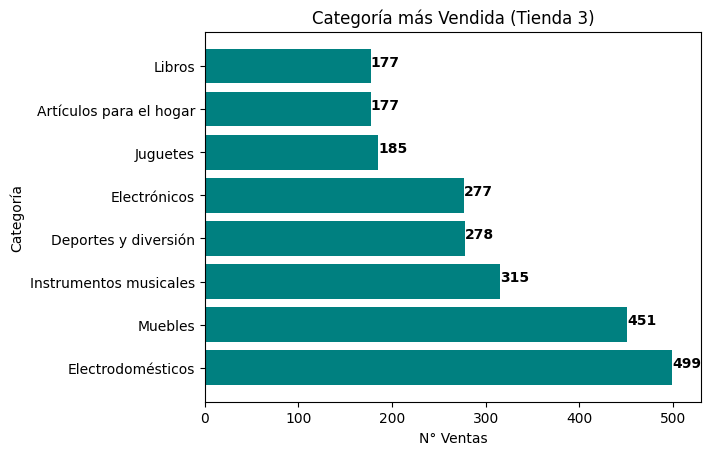

In [33]:
frecuencia3 = tienda3['Categoria'].value_counts().tolist()
nombresCategoria3 = tienda3.Categoria.unique()

lista_nombresCategoria3 = []

for categoria3 in nombresCategoria3:
  lista_nombresCategoria3.append(categoria3)

plt.barh(lista_nombresCategoria3, frecuencia3, color = "teal")

for i, v in enumerate(frecuencia3):
    plt.text(v, i, str(v), color='black', fontweight='bold')

plt.title("Categoría más Vendida (Tienda 3)")
plt.xlabel("N° Ventas")
plt.ylabel("Categoría")
plt.xlim(0, 530)
plt.show()

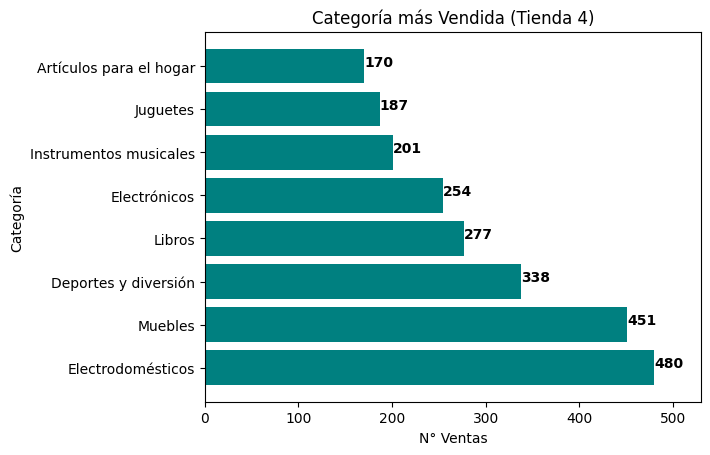

In [34]:
frecuencia4 = tienda4['Categoria'].value_counts().tolist()
nombresCategoria4 = tienda4.Categoria.unique()

lista_nombresCategoria4 = []

for categoria4 in nombresCategoria4:
  lista_nombresCategoria4.append(categoria4)

plt.barh(lista_nombresCategoria4, frecuencia4, color = "teal")

for i, v in enumerate(frecuencia4):
    plt.text(v, i, str(v), color='black', fontweight='bold')

plt.title("Categoría más Vendida (Tienda 4)")
plt.xlabel("N° Ventas")
plt.ylabel("Categoría")
plt.xlim(0, 530)
plt.show()

# 3. Calificación promedio de la tienda


In [35]:
#Contador de Puntaje
PuntajeTienda = 0
PuntajeTienda2 = 0
PuntajeTienda3 = 0
PuntajeTienda4 = 0

In [36]:
# Puntaje por ventas
maxventa = max(sum_total_ventas)
minventa = min(sum_total_ventas)

if sum_total_ventas[0] == maxventa:
  PuntajeTienda += 3
elif sum_total_ventas[1] == maxventa:
  PuntajeTienda2 += 3
elif sum_total_ventas[2] == maxventa:
  PuntajeTienda3 += 3
elif sum_total_ventas[3] == maxventa:
  PuntajeTienda4 += 3

if sum_total_ventas[0] == minventa:
  PuntajeTienda += -1
elif sum_total_ventas[1] == minventa:
  PuntajeTienda2 += -1
elif sum_total_ventas[2] == minventa:
  PuntajeTienda3 += -1
elif sum_total_ventas[3] == minventa:
  PuntajeTienda4 += -1
print(sum_total_ventas)
print(f'Tienda 1: {PuntajeTienda} ptos')
print(f'Tienda 2: {PuntajeTienda2} ptos')
print(f'Tienda 3: {PuntajeTienda3} ptos')
print(f'Tienda 4: {PuntajeTienda4} ptos')

[1150880400, 1116343500, 1098019600, 1038375700]
Tienda 1: 3 ptos
Tienda 2: 0 ptos
Tienda 3: 0 ptos
Tienda 4: -1 ptos


In [37]:
# Satisfaccion de Cliiente

CaliTienda1 = round((sum(tienda.Calificacion) / len(tienda.Calificacion)),2)
CaliTienda2 = round((sum(tienda2.Calificacion) / len(tienda2.Calificacion)),2)
CaliTienda3 = round((sum(tienda3.Calificacion) / len(tienda3.Calificacion)),2)
CaliTienda4 = round((sum(tienda4.Calificacion) / len(tienda4.Calificacion)),2)

Caliclientes = [CaliTienda1, CaliTienda2, CaliTienda3, CaliTienda4]
print(Caliclientes)
maxcali = max(Caliclientes)
mincali = min(Caliclientes)

if CaliTienda1 == maxcali:
  PuntajeTienda += 1
elif CaliTienda2 == maxcali:
  PuntajeTienda2 += 1
elif CaliTienda3 == maxcali:
  PuntajeTienda3 += 1
elif CaliTienda4 == maxcali:
  PuntajeTienda4 += 1

if CaliTienda1 == mincali:
  PuntajeTienda += -1
elif CaliTienda2 == mincali:
  PuntajeTienda2 += -1
elif CaliTienda3 == mincali:
  PuntajeTienda3 += -1
elif CaliTienda4 == mincali:
  PuntajeTienda4 += -1

print(f'Tienda 1: {PuntajeTienda} ptos')
print(f'Tienda 2: {PuntajeTienda2} ptos')
print(f'Tienda 3: {PuntajeTienda3} ptos')
print(f'Tienda 4: {PuntajeTienda4} ptos')

[3.98, 4.04, 4.05, 4.0]
Tienda 1: 2 ptos
Tienda 2: 0 ptos
Tienda 3: 1 ptos
Tienda 4: -1 ptos


In [38]:
# Puntaje menos cuotas arrreglar
PromCuotastienda1 = round((sum(tienda.Cuotas) / len(tienda.Cuotas)),2)
PromCuotastienda2 = round((sum(tienda2.Cuotas) / len(tienda2.Cuotas)),2)
PromCuotastienda3 = round((sum(tienda3.Cuotas) / len(tienda3.Cuotas)),2)
PromCuotastienda4 = round((sum(tienda4.Cuotas) / len(tienda4.Cuotas)),2)

ListaPromedioCuotas = [PromCuotastienda1, PromCuotastienda2, PromCuotastienda3, PromCuotastienda4]
print(ListaPromedioCuotas)
maxcuotas = max(ListaPromedioCuotas)
mincuotas = min(ListaPromedioCuotas)

if PromCuotastienda1 == maxcuotas:
  PuntajeTienda += -1
elif PromCuotastienda2 == maxcuotas:
  PuntajeTienda2 += -1
elif PromCuotastienda3 == maxcuotas:
  PuntajeTienda3 += -1
elif PromCuotastienda4 == maxcuotas:
  PuntajeTienda4 += -1


if PromCuotastienda1 == mincuotas:
  PuntajeTienda += 1
elif PromCuotastienda2 == mincuotas:
  PuntajeTienda2 += 1
elif PromCuotastienda3 == mincuotas:
  PuntajeTienda3 += 1
elif PromCuotastienda4 == mincuotas:
  PuntajeTienda4 += 1

print(f'Tienda 1: {PuntajeTienda} ptos')
print(f'Tienda 2: {PuntajeTienda2} ptos')
print(f'Tienda 3: {PuntajeTienda3} ptos')
print(f'Tienda 4: {PuntajeTienda4} ptos')

[2.94, 2.9, 2.97, 2.9]
Tienda 1: 2 ptos
Tienda 2: 1 ptos
Tienda 3: 0 ptos
Tienda 4: -1 ptos


In [39]:
# Fecuencia de compra
ListaFecuenciaCompras =[]
FechaAntiguaTienda1 = tienda.FechaDeCompra.min()
FechaRecienteTienda1 = tienda.FechaDeCompra.max()
date1t1 = datetime.strptime(FechaAntiguaTienda1, "%d/%m/%Y")
date2t1 = datetime.strptime(FechaRecienteTienda1, "%d/%m/%Y")
DiferenciaDate = date2t1 - date1t1
DiasTienda1 = DiferenciaDate.days
FrecuenciaCompratienda1 = round((len(tienda.FechaDeCompra) / DiasTienda1),3)
ListaFecuenciaCompras.append(FrecuenciaCompratienda1)

FechaAntiguaTienda2 = tienda2.FechaDeCompra.min()
FechaRecienteTienda2 = tienda2.FechaDeCompra.max()
date1t2 = datetime.strptime(FechaAntiguaTienda2, "%d/%m/%Y")
date2t2 = datetime.strptime(FechaRecienteTienda2, "%d/%m/%Y")
DiferenciaDate2 = date2t2 - date1t2
DiasTienda2 = DiferenciaDate2.days
FrecuenciaCompratienda2 = round((len(tienda2.FechaDeCompra) / DiasTienda2),3)
ListaFecuenciaCompras.append(FrecuenciaCompratienda2)

FechaAntiguaTienda3 = tienda3.FechaDeCompra.min()
FechaRecienteTienda3 = tienda3.FechaDeCompra.max()
date1t3 = datetime.strptime(FechaAntiguaTienda3, "%d/%m/%Y")
date2t3 = datetime.strptime(FechaRecienteTienda3, "%d/%m/%Y")
DiferenciaDate3 = date2t3 - date1t3
DiasTienda3 = DiferenciaDate3.days
FrecuenciaCompratienda3 = round((len(tienda3.FechaDeCompra) / DiasTienda3),3)
ListaFecuenciaCompras.append(FrecuenciaCompratienda3)

FechaAntiguaTienda4 = tienda4.FechaDeCompra.min()
FechaRecienteTienda4 = tienda4.FechaDeCompra.max()
date1t4 = datetime.strptime(FechaAntiguaTienda4, "%d/%m/%Y")
date2t4 = datetime.strptime(FechaRecienteTienda4, "%d/%m/%Y")
DiferenciaDate4 = date2t4 - date1t4
DiasTienda4 = DiferenciaDate4.days
FrecuenciaCompratienda4 = round((len(tienda4.FechaDeCompra) / DiasTienda4),3)
ListaFecuenciaCompras.append(FrecuenciaCompratienda4)

print(ListaFecuenciaCompras)

maxfrecuencia = max(ListaFecuenciaCompras)
minfrecuencia = min(ListaFecuenciaCompras)

if ListaFecuenciaCompras[0] == maxfrecuencia:
  PuntajeTienda += 1
elif ListaFecuenciaCompras[1] == maxfrecuencia:
  PuntajeTienda2 += 1
elif ListaFecuenciaCompras[2] == maxfrecuencia:
  PuntajeTienda3 += 1
elif ListaFecuenciaCompras[3] == maxfrecuencia:
  PuntajeTienda4 += 1

if ListaFecuenciaCompras[0] == minfrecuencia:
  PuntajeTienda += -1
elif ListaFecuenciaCompras[1] == minfrecuencia:
  PuntajeTienda2 += -1
elif ListaFecuenciaCompras[2] == minfrecuencia:
  PuntajeTienda3 += -1
elif ListaFecuenciaCompras[3] == minfrecuencia:
  PuntajeTienda4 += -1

print(f'Tienda 1: {PuntajeTienda} ptos')
print(f'Tienda 2: {PuntajeTienda2} ptos')
print(f'Tienda 3: {PuntajeTienda3} ptos')
print(f'Tienda 4: {PuntajeTienda4} ptos')

[2.154, 2.154, 3.232, 2.153]
Tienda 1: 2 ptos
Tienda 2: 1 ptos
Tienda 3: 1 ptos
Tienda 4: -2 ptos


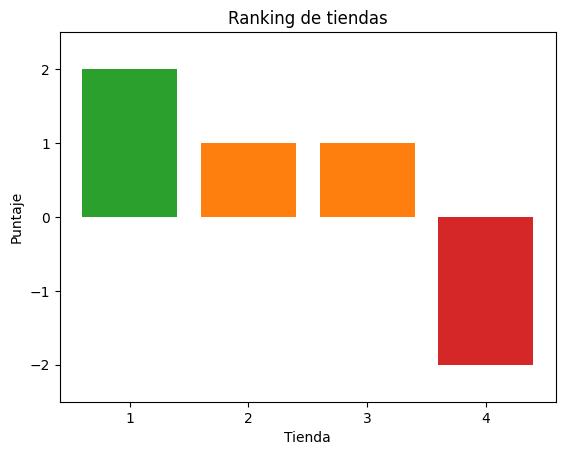

In [43]:
ListaPuntaje = [PuntajeTienda, PuntajeTienda2, PuntajeTienda3, PuntajeTienda4]
plt.bar(["1", "2", "3", "4"], ListaPuntaje, color = ['tab:green', 'tab:orange', 'tab:orange', 'tab:red'])
plt.title("Ranking de tiendas")
plt.xlabel("Tienda")
plt.ylabel("Puntaje")
plt.yticks([-2, -1, 0, 1, 2])
plt.ylim(-2.5, 2.5)
plt.show()


# 4. Productos más y menos vendidos

In [44]:
MasVendido = tienda.Producto.value_counts().head(3)
print('Top 3 tienda 1')
print(MasVendido)
print('')

MasVendido2 = tienda2.Producto.value_counts().head(3)
print('Top 3 tienda 2')
print(MasVendido2)
print('')

MasVendido3 = tienda3.Producto.value_counts().head(3)
print('Top 3 tienda 3')
print(MasVendido3)
print('')

MasVendido4 = tienda4.Producto.value_counts().head(3)
print('Top 3 tienda 4')
print(MasVendido4)
print('')

Top 3 tienda 1
Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64

Top 3 tienda 2
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Name: count, dtype: int64

Top 3 tienda 3
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Name: count, dtype: int64

Top 3 tienda 4
Producto
Cama box                   62
Cubertería                 59
Dashboards con Power BI    56
Name: count, dtype: int64



In [45]:
MenosVendido = tienda.Producto.value_counts().idxmin()
print('Menos vendido tienda 1')
print(MenosVendido)
print('')
MenosVendido2 = tienda.Producto.value_counts().idxmin()
print('Menos vendido tienda 2')
print(MenosVendido2)
print('')
MenosVendido3 = tienda.Producto.value_counts().idxmin()
print('Menos vendido tienda 3')
print(MenosVendido3)
print('')
MenosVendido4 = tienda.Producto.value_counts().idxmin()
print('Menos vendido tienda 4')
print(MenosVendido4)
print('')

Menos vendido tienda 1
Auriculares con micrófono

Menos vendido tienda 2
Auriculares con micrófono

Menos vendido tienda 3
Auriculares con micrófono

Menos vendido tienda 4
Auriculares con micrófono



# 5. Envío promedio por tienda

In [46]:
PromedioEnviotienda = round((sum(tienda.Envio) / len(tienda.Envio)),2)
print(f'Promedio Envío Tienda 1 --> {PromedioEnviotienda}')
PromedioEnviotienda2 = round((sum(tienda2.Envio) / len(tienda2.Envio)),2)
print(f'Promedio Envío Tienda 2 --> {PromedioEnviotienda2}')
PromedioEnviotienda3 = round((sum(tienda3.Envio) / len(tienda3.Envio)),2)
print(f'Promedio Envío Tienda 3 --> {PromedioEnviotienda3}')
PromedioEnviotienda4 = round((sum(tienda4.Envio) / len(tienda4.Envio)),2)
print(f'Promedio Envío Tienda 4 --> {PromedioEnviotienda4}')

Promedio Envío Tienda 1 --> 26018.61
Promedio Envío Tienda 2 --> 25216.24
Promedio Envío Tienda 3 --> 24805.68
Promedio Envío Tienda 4 --> 23459.46


#Introducción

El presente informe tiene como finalidad, lograr determinar cual de las tiendas de Mr Joao es la que debe vender para poder iniciar nuevos proyectos. Para lo cual se realizará un análisis de los datos de venta de cada tienda, los cuales han sido cargados desde archivos CSV. Este análisis utiliza distintas librerías y métodos para lograr determinar lo anterior, asi como también se brinda soporte visual de alguno resultados mediante le uso de distintis tipos de gráficos.  

#Resultados
*Resultados y procedimientos en el codigo arriba*

#Discucion de Resultados
##Apartados
### 1. Análisis de facturación
  Se realizo un anális del total de las ventas de cada una de las 4 tiendas. En primer lugar se realió la suma de la venta de los productos, en donde la tienda que más monto de venta genera es la tienda 1 y la que menos ingresos genera por ventas es la tienda 4.
  Como segunda parte del analisis, se contabilizó el universo total de ingresos
  considerando el monto aportado por cada tienda para conocer su porcentaje de
  participación dentro del total del ingresos, en donde se confirma el resultado de la primera parte del análisis, además de establecer que la diferencia de ventas entre tiendas  1 y 4 es de un 2.5%.  

### 2. Ventas por categoría
  Para el análisis de categorias, se realizó el conteo de número de ventas de cada producto correspondientes a cada categoria en cada una de las tiendas. Si bien la categoria más y menos vendida varía de cada una de las tiendas, repitiendose en algunos casos, los resultados son los siguientes:
  
  Los más vendidos son --> tienda1: Electronicos tienda2: Muebles tienda3: Electrodomésticos tienda4: Electrodomésticos
  
  Los menos vendidos son --> tienda1: Instrumentos Musicales tienda2: Libros tienda3: Libros tienda4: Artículos para el hogar

### 3. Calificación promedio de la tienda
  Se establecieron 4 criterios para la evaluación de las tiendas. El primer criterio y el que posee mayor ponderación es el ingreso por ventas (3 pts). El segundo criterio evaluado es el Nivel de satisfacion del cliente en base a sus valoraciones de produstos(1 pts). Otro criterio de evaluación es la cantidad de cuotas en la que se pagan los productos, siendo a menor cantidad de cuotas mayor la liquidez (1 pts). Finalmente, el último criterio de evaluación es la frecuencia de compras evaluado en Compras por día (1 pts). Como resultado de lo anterior, los puntajes de las 4 tiendas son los siguientes:

  Ranking --> tienda1: 2 tienda2: 1 tienda3: 1 tienda4: -4

### 4. Productos más y menos vendidos
  Para el conteo de los productos más vendidos se realizó un desglose por tienda igual forma  lo realizado en el apartado numero 2. Estos resultados son variados en cuanto al producto más vendido.
  Top Ventas --> tienda1: Microondas tienda2: Iniciando en programación tienda3: Kit de bancas tienda4: Cama box
  Mientras tanto en la vereda oppuesta el articulo menos vendido se repite en las 4 tiendas, siendo este: Auriculares con micrófono
### 5. Envío promedio por tienda
  Finalmente, el costo de envío de cada tienda se analizó mediante el uso del promedio de estos. Lo que nos entrega una categorización del coste de envio de las 4 tiendas.
  Tienda 1 --> 26018.61, Tienda 2 --> 25216.24, Tienda 3 --> 24805.68, Tienda 4 --> 23459.46  

#Conclusión

En General, el rendimineto de las 4 tiendas es similiar, pero mediante los análisis realizados y explicados en los apartados anteriores se lo logró identificar las diferencias que permiten dirimir lo que viene a continuación.
La tienda que se debe vender para acceder a nuevos proyectos es la *tienda 4*  ya que es la que presenta menor ingresos, posee la segunda peor calificación de los productos vendidos y possee la menor frecuencia de compras en comparación al resto de tiendas.
Otra recomendacion es evaluar la venta del producto *Audiculares con micrófono* ya que es el menos vendido en todas las tiendas.